In [1]:
import torch

from mlxtend.data import loadlocal_mnist
from nn.regression import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
x_train, y_train = loadlocal_mnist(
                    images_path='data/mnist/train/train-images-idx3-ubyte',
                    labels_path='data/mnist/train/train-labels-idx1-ubyte')

x_test, y_test = loadlocal_mnist(
                    images_path='data/mnist/test/t10k-images-idx3-ubyte',
                    labels_path='data/mnist/test/t10k-labels-idx1-ubyte')

In [3]:
digits = (3, 7)
regression = LogisticRegression(x_train, 
                                x_test, 
                                y_train, 
                                y_test, 
                                digits, 
                                learning_rate=1e-3)

In [4]:
theta = regression.fit(stop=10)

In [5]:
theta.shape

torch.Size([784, 1])

In [6]:
pred = regression.predict(theta)

In [7]:
acc = regression.acc(pred)
print(f'Acuracia do modelo {acc: 02.2f}% para os digitos: {regression.digits}')

Acuracia do modelo  96.91% para os digitos: (3, 7)


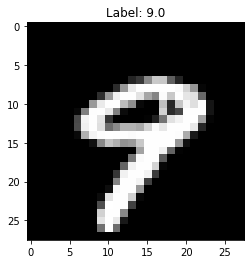

In [11]:
sample = 9

img = torch.reshape(regression.x_test[sample], (28, 28))

plt.imshow(img, cmap='gray')
plt.title(f'Label: {regression.y_test[sample].item()}')

plt.show()